# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [1]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
full_path = drive_path + project_folder

# Check if the directory exists, if not, create it
if not os.path.exists(full_path):
    os.makedirs(full_path)
    print(f"Created directory: {full_path}")

os.chdir(full_path)

## Step 0 | Imports and Setup

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
# Open a dataset from your project folder in Google Drive
data = pd.read_excel('EconProjectExcel.xlsx')

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [5]:
# Data operations here
df = pd.read_excel("EconProjectExcel.xlsx")
print(df.head())
print(df.columns)



              Quarterbacks  \
0        Jared Goff (2016)   
1  Patrick Mahommes (2017)   
2    Deshaun Watson (2017)   
3    Baker Mayfield (2018)   
4        Josh Allen (2018)   

   Amount of Years in College (7 games played or more)  Largest Contract  
0                                                  3           212000000  
1                                                  3           450000000  
2                                                  3           230000000  
3                                                  4           100000000  
4                                                  2           330000000  
Index(['Quarterbacks', 'Amount of Years in College (7 games played or more)',
       'Largest Contract'],
      dtype='object')


In [6]:

# Load your file
df = pd.read_excel("EconProjectExcel.xlsx")

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w]", "", regex=True)
)





df['quarterback'] = df['quarterbacks'].str.replace(r"(\d{4})", "", regex=True).str.strip()


df['years_in_college'] = pd.to_numeric(
    df['amount_of_years_in_college_7_games_played_or_more'],
    errors='coerce'
)

df['largest_contract'] = pd.to_numeric(
    df['largest_contract'],
    errors='coerce'
)

clean_df = df[['quarterback', 'years_in_college', 'largest_contract']]

print(clean_df)


             quarterback  years_in_college  largest_contract
0          Jared Goff ()                 3         212000000
1    Patrick Mahommes ()                 3         450000000
2      Deshaun Watson ()                 3         230000000
3      Baker Mayfield ()                 4         100000000
4          Josh Allen ()                 2         330000000
5       Lamar Jackson ()                 3         260000000
6        Kyler Murray ()                 1         230500000
7          Joe Burrow ()                 2         275000000
8       Tua Tugavoila ()                 3         212400000
9      Justin Herbert ()                 4         262500000
10        Jordan Love ()                 3         220000000
11    Trevor Lawrence ()                 3         275000000
12          EJ Manuel ()                 4           8885300
13      Blake Bortles ()                 3          34947000
14     Johnny Manziel ()                 2           8248596
15  Teddy Bridgewater ()

In [7]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [8]:
# Exploratory Data Analysis here
Independent Variable: Years in College
Dependent Variable: Largest Contract
Relationship of interest: Does a higher number of "years in college" correlate with a higher "largest contract" value?

SyntaxError: invalid syntax (ipython-input-3866816764.py, line 2)

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

Null Hypothesis: There is no relationship between the number of years a quarterback plays in college and their largest NFL contract.
            H0​:β1​=0

Statistical Model: LargestContract= β0​+β1​(YearsCollege) + ϵ

In [9]:
# Build and run your model here
model = smf.ols(
    formula='largest_contract ~ years_in_college',
    data=clean_df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       largest_contract   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.2273
Date:                Fri, 12 Dec 2025   Prob (F-statistic):              0.637
Time:                        15:16:03   Log-Likelihood:                -679.86
No. Observations:                  34   AIC:                             1364.
Df Residuals:                      32   BIC:                             1367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.863e+07    6.2e+07  

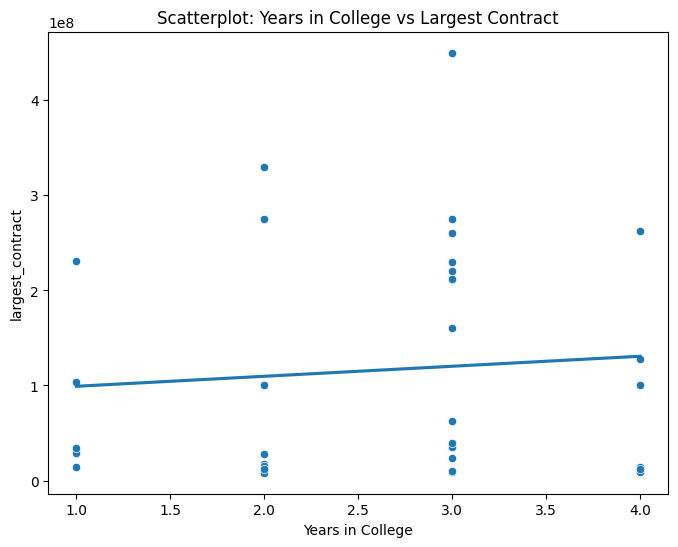

In [10]:


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="years_in_college", y="largest_contract")

sns.regplot(
    data=df,
    x="years_in_college",
    y="largest_contract",
    scatter=False,
    ci=None
)
plt.xlabel("Years in College")
plt.title("Scatterplot: Years in College vs Largest Contract")

plt.show()